## Sarcasm detection model using tensorflow

In [10]:
import json

In [11]:
# def fix_json_format(input_file, output_file):
#     """
#     Reads a JSON file with each object on a separate line and writes it to a new file in the correct format.

#     Args:
#         input_file: The path to the input JSON file.
#         output_file: The path to the output JSON file.
#     """

#     data = []
#     with open(input_file, 'r') as f:
#         for line in f:
#             data.append(json.loads(line))

#     with open(output_file, 'w') as f:
#         json.dump(data, f, indent=4)

# # Example usage:
# input_file = '../../data/Sarcasm_Headlines_Dataset.json'
# output_file = '../../data/correct_sarcasm.json'
# fix_json_format(input_file, output_file)

with open('../../data/correct_sarcasm.json', 'r') as f:
    data = json.load(f)

sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [12]:
# splitting the dataset

training_size = 0.8

training_sentences = sentences[0:int(training_size * len(sentences))]
testing_sentences = sentences[int(training_size * len(sentences)):]

training_labels = labels[0:int(training_size * len(labels))]
testing_labels = labels[int(training_size * len(labels)):]

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report


#### Tokenizing the text data

In [14]:
max_vocab_size = 10000  # Maximum number of words in the vocabulary
max_sequence_length = 40  # Maximum length of each sentence

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)


#### Converting sentences to sequences

In [15]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#### Padding sequences to ensure equal length

In [18]:
training_padded = pad_sequences(training_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
testing_padded = pad_sequences(testing_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

#### **Building the model**

In [19]:
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=16, input_length=max_sequence_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### Compiling the model

In [20]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

#### Convert labels to NumPy arrays

In [22]:
import numpy as np
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

#### Training the model

In [23]:
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(testing_padded, testing_labels)
                    )

Epoch 1/10
668/668 [==============================] - 3s 2ms/step - loss: 0.6075 - accuracy: 0.6513 - val_loss: 0.4234 - val_accuracy: 0.8272
Epoch 2/10
668/668 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8676 - val_loss: 0.3482 - val_accuracy: 0.8568
Epoch 3/10
668/668 [==============================] - 2s 2ms/step - loss: 0.2510 - accuracy: 0.9027 - val_loss: 0.3439 - val_accuracy: 0.8570
Epoch 4/10
668/668 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.9217 - val_loss: 0.3545 - val_accuracy: 0.8545
Epoch 5/10
668/668 [==============================] - 2s 2ms/step - loss: 0.1745 - accuracy: 0.9348 - val_loss: 0.3757 - val_accuracy: 0.8516
Epoch 6/10
668/668 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9437 - val_loss: 0.4069 - val_accuracy: 0.8480
Epoch 7/10
668/668 [==============================] - 1s 2ms/step - loss: 0.1318 - accuracy: 0.9524 - val_loss: 0.4349 - val_accuracy: 0.8471
Epoch 

In [24]:
# Evaluating the model
loss, accuracy = model.evaluate(testing_padded, testing_labels)
print(f"Test Accuracy: {accuracy:.4f}")

167/167 [==============================] - 0s 986us/step - loss: 0.5527 - accuracy: 0.8381
Test Accuracy: 0.8381


In [25]:
# Make predictions on the test data
predictions = model.predict(testing_padded)
predictions = (predictions > 0.5).astype(int)  # Converting to binary output

167/167 [==============================] - 0s 947us/step


In [26]:
# Print classification report
print("\nClassification Report:")
print(classification_report(testing_labels, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3034
           1       0.82      0.80      0.81      2308

    accuracy                           0.84      5342
   macro avg       0.84      0.83      0.83      5342
weighted avg       0.84      0.84      0.84      5342



In [27]:
# Optionally, plot training/validation accuracy and loss
import matplotlib.pyplot as plt

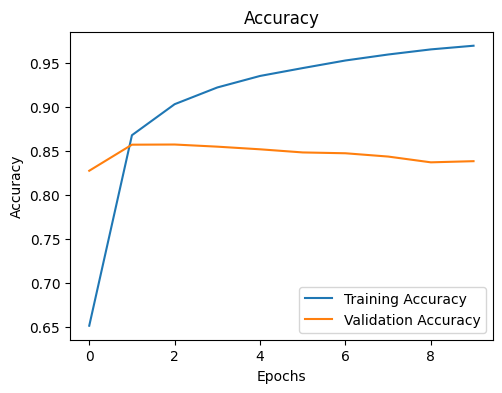

In [28]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

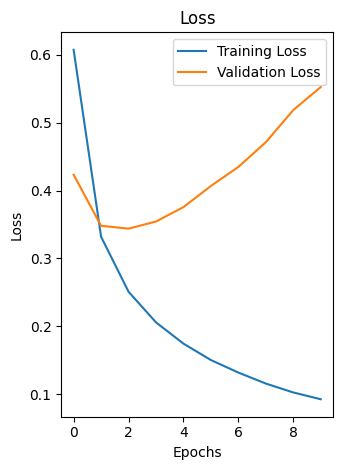

In [29]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()